In [2]:
import pandas as pd
from gensim import corpora, models, similarities
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
MCTest_df = pd.read_csv('std_data/MCTest/mc500/mc500.train.csv',index_col=0)
Race_df = pd.read_csv('std_data/RACE/middle/train.csv',index_col=0)
Dream_df = pd.read_csv('std_data/Dream/train.csv')

In [15]:
MCTest_df = MCTest_df[(MCTest_df.question_type=='multiple')].reset_index(drop=True)
MCTest_df

,id,author,work_times,article,question_type,question,A,B,C,D,answer
0,mc500.train.0,2778399758,839;Qual. score: 80;Creativity Words: granddau...,Alyssa got to the beach after a long trip. She...,multiple,How many friends does Alyssa have?,1,2,3,4,C
1,mc500.train.0,2778399758,839;Qual. score: 80;Creativity Words: granddau...,Alyssa got to the beach after a long trip. She...,multiple,What did Alyssa eat at the restaurant?,steak,soup,salad,catfish,D
2,mc500.train.1,3208685851,836;Qual. score: 95;Creativity Words: elephant...,"One morning, Elena woke up, much like she did ...",multiple,What is the very first thing Elena does after ...,she says hello to the tree,she throws the covers on the floor,she says hello to the sun,she gets out of bed,B
3,mc500.train.1,3208685851,836;Qual. score: 95;Creativity Words: elephant...,"One morning, Elena woke up, much like she did ...",multiple,What happened to Mr. Fish in the end?,"He got put back in the bowl, but he was dead",He started swimming around in Elena's hand,He got put in a new bowl,He got put back in his bowl and started swimmi...,D
4,mc500.train.1,3208685851,836;Qual. score: 95;Creativity Words: elephant...,"One morning, Elena woke up, much like she did ...",multiple,What was missing from the fish bowl?,the rocks,Mr. Fish,the water,the tiny castle,B
5,mc500.train.2,3165469218,"1546;Qual. score: 90;Creativity Words: feed,st...",Billy was like a king on the school yard. A ki...,multiple,Billy was like a...,prince,dummy,queen,king,D
6,mc500.train.2,3165469218,"1546;Qual. score: 90;Creativity Words: feed,st...",Billy was like a king on the school yard. A ki...,multiple,Who was Billy?,The skinny kid,A teacher,A little kid,The big kid,D
7,mc500.train.3,3323630398,"712;Qual. score: 90;Creativity Words: farm,mes...",Billy went to the farm to buy some beef for hi...,multiple,What color were the spots on the cows?,Blue,Brown,White,Black,B
8,mc500.train.3,3323630398,"712;Qual. score: 90;Creativity Words: farm,mes...",Billy went to the farm to buy some beef for hi...,multiple,How many chickens were on the purple fence?,Ten,Six,Five,Four,C
9,mc500.train.4,646501657,"743;Qual. score: 90;Creativity Words: paint,co...",The road to Grandpa's house was long and windi...,multiple,Why did Grandpa answer the door?,Because he saw the insects,Because Jimmy was walking,Because Jimmy knocked,Because the trip took a long time,C


In [16]:
MCTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 11 columns):
id               653 non-null object
author           653 non-null int64
work_times       653 non-null object
article          653 non-null object
question_type    653 non-null object
question         653 non-null object
A                653 non-null object
B                653 non-null object
C                653 non-null object
D                653 non-null object
answer           653 non-null object
dtypes: int64(1), object(10)
memory usage: 56.2+ KB


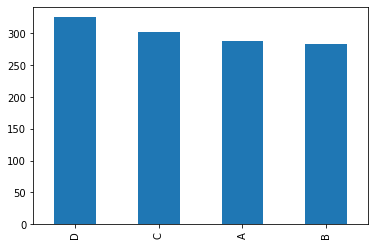

In [6]:
MCTest_df.answer.value_counts().plot(kind='bar')

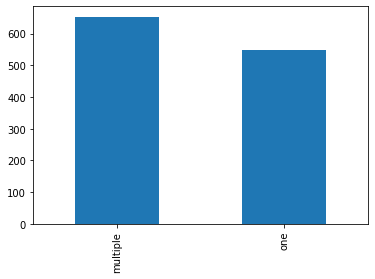

In [7]:
MCTest_df.question_type.value_counts().plot(kind='bar')

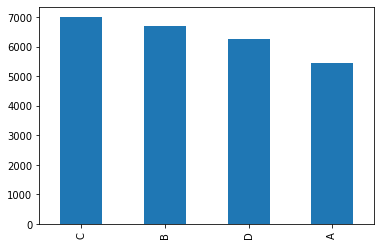

In [8]:
Race_df.answer.value_counts().plot(kind='bar')

In [9]:
answer=[]
for (ans,A,B,C) in zip(Dream_df.Answer,Dream_df.Choice1,Dream_df.Choice2,Dream_df.Choice3):
    if ans == A:
       answer.append('A') 
    elif ans == B:
       answer.append('B') 
    elif ans == C:
       answer.append('C') 
    elif ans == D:
       answer.append('D') 
    
Dream_df['answer'] = answer

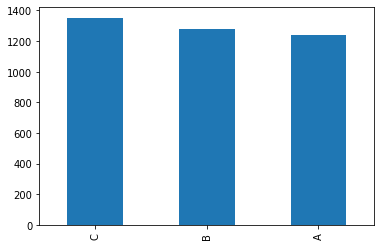

In [10]:
Dream_df.answer.value_counts().plot(kind='bar')

In [17]:
i=0
MCTest_df = MCTest_df[(MCTest_df.question_type=='multiple')].reset_index(drop=True)
#MCTest_df[(MCTest_df.question_type=='one')].reset_index(drop=True)

train_df=MCTest_df

print("Passage: " + train_df['article'][i] +"\n")
print("Question: " + train_df['question'][i])


options = [train_df['A'][i],train_df['B'][i],train_df['C'][i],train_df['D'][i]]
print("Options: ")
print("A: " + train_df['A'][i])
print("B: " + train_df['B'][i])
print("C: " + train_df['C'][i])
print("D: " + train_df['D'][i])

print("Expected Answer: " + train_df['answer'][i])



Passage: Alyssa got to the beach after a long trip. She's from Charlotte. She traveled from Atlanta. She's now in Miami. She went to Miami to visit some friends. But she wanted some time to herself at the beach, so she went there first. After going swimming and laying out, she went to her friend Ellen's house. Ellen greeted Alyssa and they both had some lemonade to drink. Alyssa called her friends Kristin and Rachel to meet at Ellen's house. The girls traded stories and caught up on their lives. It was a happy time for everyone. The girls went to a restaurant for dinner. The restaurant had a special on catfish. Alyssa enjoyed the restaurant's special. Ellen ordered a salad. Kristin had soup. Rachel had a steak. After eating, the ladies went back to Ellen's house to have fun. They had lots of fun. They stayed the night because they were tired. Alyssa was happy to spend time with her friends again.

Question: How many friends does Alyssa have?
Options: 
A: 1
B: 2
C: 3
D: 4
Expected Answe

In [57]:
i=0
train_df=Dream_df

print("Conversation: " + train_df['Conversation'][i] +"\n")
print("Question: " + train_df['Question'][i])


options = [train_df['Choice1'][i],train_df['Choice2'][i],train_df['Choice3'][i]]
print("Options: ")
print("A: " + train_df['Choice1'][i])
print("B: " + train_df['Choice2'][i])
print("C: " + train_df['Choice3'][i])


print("Expected Answer: " + train_df['Answer'][i])

Conversation: M: I am considering dropping my dancing class. I am not making any progress. W: If I were you, I stick with it. It's definitely worth time and effort.

Question: What does the man suggest the woman do?
Options: 
A: Consult her dancing teacher.
B: Take a more interesting class.
C: Continue her dancing class.
Expected Answer: Continue her dancing class.


In [53]:
Dream_df.head()


,Number,Conversation,Question,Choice1,Choice2,Choice3,Answer
0,5-510,M: I am considering dropping my dancing class....,What does the man suggest the woman do?,Consult her dancing teacher.,Take a more interesting class.,Continue her dancing class.,Continue her dancing class.
1,7-200,"W: Well, I'm afraid my cooking isn't to your t...",What does the man think of the woman's cooking?,It's really terrible.,It's very good indeed.,It's better than what he does.,It's very good indeed.
2,12-511,"M: Look at the girl on the bike! F: Oh, yes sh...",Where are the two persons?,At home,In their classroom,On the street,On the street
3,16-83,M: Can you accompany me while I am singing. W:...,What does the man want the woman to do?,To play the piano.,To give a performance.,To sing a song.,To play the piano.
4,5-231,W: I can't figure out what's wrong with my wat...,What does the man mean?,It will take about one month to repair the watch.,The watch is no longer worth repairing.,It is a good idea to keep the old watch.,The watch is no longer worth repairing.
